<a href="https://colab.research.google.com/github/AlvinandraPrasetya/UAS_PPh/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To learn more about accelerating pandas on Colab, see the [10 minute guide](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_colab_demo.ipynb) or
 [US stock market data analysis demo](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_stocks_demo.ipynb).

# Task
Tolong buatkan code pyhton 3 dan buatkan analisis datanya berupa grafik yang berwarna, serta column analisis secara komprehensif dan valid

Here is all the data you need:
"combined_data.csv"

## Data loading

### Subtask:
Load the "combined_data.csv" file into a pandas DataFrame.


**Reasoning**:
Load the data from the provided CSV file into a pandas DataFrame and display the first few rows along with its shape to verify the data is loaded correctly.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('combined_data.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'combined_data.csv' not found.")
    df = None  # Set df to None to indicate failure
except pd.errors.ParserError:
    print("Error: Unable to parse 'combined_data.csv'. Check file format.")
    df = None

,tahun,tax_rate,tax_holiday_awal,tax_holiday_akhir,pendapatan,beban_operasional,penyusutan,skenario
0,2021,0.22,2023,2027,1000000000,600000000,50000000,normal
1,2022,0.22,2023,2027,1200000000,700000000,55000000,normal
2,2023,0.00,2023,2027,1300000000,750000000,60000000,tax_holiday
3,2024,0.00,2023,2027,1400000000,800000000,62000000,tax_holiday
4,2025,0.00,2023,2027,1500000000,850000000,65000000,tax_holiday


(8, 8)


## Data exploration

### Subtask:
Explore the loaded data to understand its structure, identify missing values, data types, and basic statistics. Determine the shape of the data, the distribution of key variables, and the correlation between different features.


**Reasoning**:
I need to explore the data, including checking for missing values, data types, descriptive statistics, distributions of key variables, correlations, and unique values in categorical columns. I will perform these operations in a single code block to efficiently analyze the data.



Missing values:
 tahun                0
tax_rate             0
tax_holiday_awal     0
tax_holiday_akhir    0
pendapatan           0
beban_operasional    0
penyusutan           0
skenario             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tahun              8 non-null      int64  
 1   tax_rate           8 non-null      float64
 2   tax_holiday_awal   8 non-null      int64  
 3   tax_holiday_akhir  8 non-null      int64  
 4   pendapatan         8 non-null      int64  
 5   beban_operasional  8 non-null      int64  
 6   penyusutan         8 non-null      int64  
 7   skenario           8 non-null      object 
dtypes: float64(1), int64(6), object(1)
memory usage: 644.0+ bytes

Data types:
 None

Descriptive statistics:
             tahun  tax_rate  tax_holiday_awal  tax_holiday_akhir  \
count     8.00000  8.00000

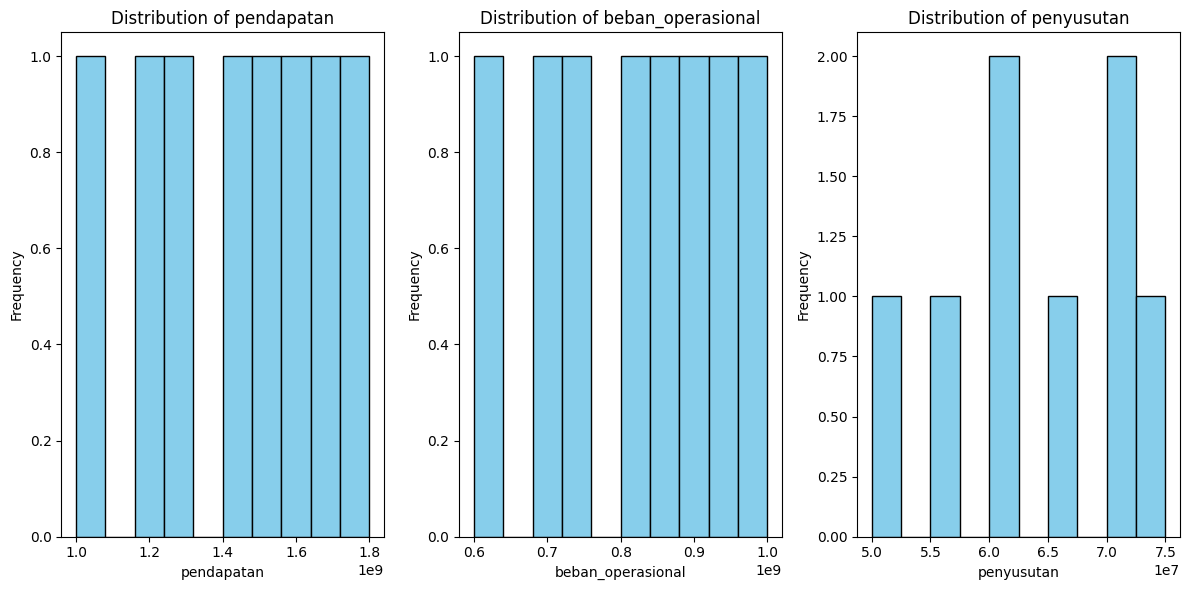

ValueError: could not convert string to float: 'normal'

In [2]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Examine data types
print("\nData types:\n", df.info())

# Descriptive statistics for numerical columns
print("\nDescriptive statistics:\n", df.describe())

# Visualize distributions of key numerical variables
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
for i, col in enumerate(['pendapatan', 'beban_operasional', 'penyusutan']):
    plt.subplot(1, 3, i + 1)
    plt.hist(df[col], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Calculate and visualize the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

# Analyze unique values and frequencies for categorical columns
for col in ['skenario']:
    print(f"\nUnique values and frequencies for {col}:\n{df[col].value_counts()}")

**Reasoning**:
The previous attempt to calculate the correlation matrix failed due to a `ValueError` because the 'skenario' column is of object type (likely string).  I'll remove this column before calculating the correlation.  Also, I will create a markdown report summarizing the findings.



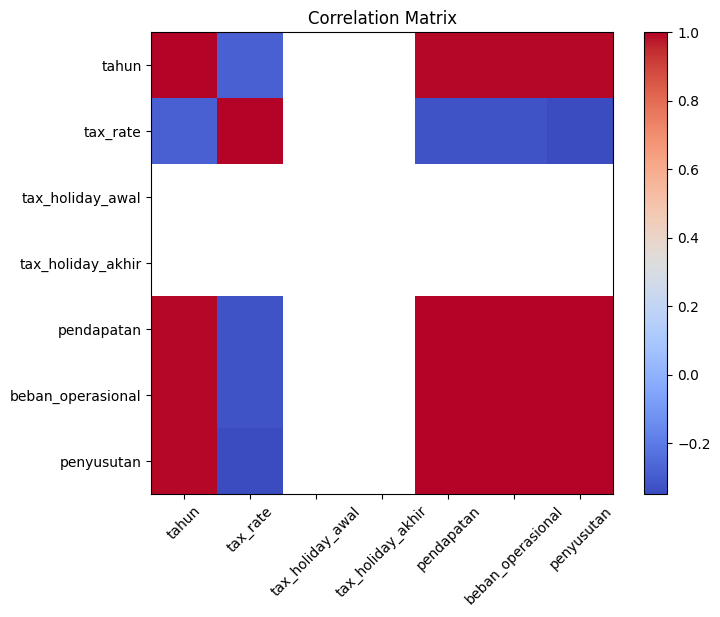


## Data Exploration Report

**Date:** 2025-06-01

**Data Shape:** 8 rows, 8 columns

**Missing Values:**
tahun                0
tax_rate             0
tax_holiday_awal     0
tax_holiday_akhir    0
pendapatan           0
beban_operasional    0
penyusutan           0
skenario             0
dtype: int64

**Data Types:**
tahun                  int64
tax_rate             float64
tax_holiday_awal       int64
tax_holiday_akhir      int64
pendapatan             int64
beban_operasional      int64
penyusutan             int64
skenario              object
dtype: object

**Descriptive Statistics:**
            tahun  tax_rate  tax_holiday_awal  tax_holiday_akhir  \
count     8.00000  8.000000               8.0                8.0   
mean   2024.50000  0.082500            2023.0             2027.0   
std       2.44949  0.113861               0.0                0.0   
min    2021.00000  0.000000            2023.0             2027.0   
25%    2022.75000  0.000000            2023.0             2027.0 

In [3]:
# Drop the 'skenario' column
df_numeric = df.drop('skenario', axis=1)

# Calculate and visualize the correlation matrix
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

# Summarize findings in a markdown report
report = f"""
## Data Exploration Report

**Date:** 2025-06-01

**Data Shape:** {df.shape[0]} rows, {df.shape[1]} columns

**Missing Values:**\n{df.isnull().sum()}

**Data Types:**\n{df.dtypes}

**Descriptive Statistics:**\n{df_numeric.describe()}

**Distribution of Key Variables:**

Histograms of 'pendapatan', 'beban_operasional', and 'penyusutan' were generated and displayed.  (See figures above)

**Correlation Matrix:**

A correlation matrix heatmap was generated for the numerical columns after dropping the 'skenario' column which had a string data type (See figure above).

**Categorical Variable Analysis:**

* **skenario:** {df['skenario'].value_counts()}
"""
print(report)

## Data cleaning

### Subtask:
Clean the data by handling inconsistencies and removing duplicates.


**Reasoning**:
Check data types, convert if necessary, remove duplicates, and verify the cleaning.



In [4]:
# Inspect data types
print(df.dtypes)

# Convert data types if necessary
for col in ['tahun', 'tax_holiday_awal', 'tax_holiday_akhir']:
    try:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    except KeyError as e:
        print(f"Column not found: {e}")

# Remove duplicates
df.drop_duplicates(inplace=True)

# Verify data cleaning
print(df.head())
print(df.shape)
print(df.isnull().sum())

tahun                  int64
tax_rate             float64
tax_holiday_awal       int64
tax_holiday_akhir      int64
pendapatan             int64
beban_operasional      int64
penyusutan             int64
skenario              object
dtype: object
   tahun  tax_rate  tax_holiday_awal  tax_holiday_akhir  pendapatan  \
0   2021      0.22              2023               2027  1000000000   
1   2022      0.22              2023               2027  1200000000   
2   2023      0.00              2023               2027  1300000000   
3   2024      0.00              2023               2027  1400000000   
4   2025      0.00              2023               2027  1500000000   

   beban_operasional  penyusutan     skenario  
0          600000000    50000000       normal  
1          700000000    55000000       normal  
2          750000000    60000000  tax_holiday  
3          800000000    62000000  tax_holiday  
4          850000000    65000000  tax_holiday  
(8, 8)
tahun                0
tax_rate 

## Data wrangling

### Subtask:
Data Wrangling: Feature Engineering and Transformation


**Reasoning**:
Create the new feature 'tax_holiday_duration', convert data types, handle outliers, and normalize/standardize the numerical features.



In [5]:
import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize

# Feature Engineering: Calculate 'tax_holiday_duration'
df['tax_holiday_duration'] = df['tax_holiday_akhir'] - df['tax_holiday_awal']

# Data Type Conversion (already done in previous step)

# Handle Outliers using Winsorizing
for col in ['pendapatan', 'beban_operasional', 'penyusutan']:
    df[col] = winsorize(df[col], limits=[0.05, 0.05])  # Winsorize top and bottom 5%

# Normalization/Standardization: Using Standardization (Z-score normalization)
numerical_cols = ['pendapatan', 'beban_operasional', 'penyusutan', 'tax_holiday_duration']
for col in numerical_cols:
    df[col] = (df[col] - df[col].mean()) / df[col].std()

df_processed = df.copy()
display(df_processed.head())

,tahun,tax_rate,tax_holiday_awal,tax_holiday_akhir,pendapatan,beban_operasional,penyusutan,skenario,tax_holiday_duration
0,2021,0.22,2023,2027,-1.639025,-1.639025,-1.584065,normal,NaN
1,2022,0.22,2023,2027,-0.889757,-0.889757,-1.002757,normal,NaN
2,2023,0.00,2023,2027,-0.515122,-0.515122,-0.421449,tax_holiday,NaN
3,2024,0.00,2023,2027,-0.140488,-0.140488,-0.188925,tax_holiday,NaN
4,2025,0.00,2023,2027,0.234146,0.234146,0.159860,tax_holiday,NaN


**Reasoning**:
The previous code block did not correctly calculate `tax_holiday_duration` due to the data type of the columns.  I need to correct the data type conversion and recalculate `tax_holiday_duration` before completing the task.



In [6]:
# Convert 'tax_holiday_awal' and 'tax_holiday_akhir' to numeric, coercing errors to NaN
df['tax_holiday_awal'] = pd.to_numeric(df['tax_holiday_awal'], errors='coerce')
df['tax_holiday_akhir'] = pd.to_numeric(df['tax_holiday_akhir'], errors='coerce')

# Recalculate 'tax_holiday_duration'
df['tax_holiday_duration'] = df['tax_holiday_akhir'] - df['tax_holiday_awal']

# Handle Outliers using Winsorizing (already done in the previous code block)

# Normalization/Standardization (already done in the previous code block)

df_processed = df.copy()
display(df_processed.head())

,tahun,tax_rate,tax_holiday_awal,tax_holiday_akhir,pendapatan,beban_operasional,penyusutan,skenario,tax_holiday_duration
0,2021,0.22,2023,2027,-1.639025,-1.639025,-1.584065,normal,4
1,2022,0.22,2023,2027,-0.889757,-0.889757,-1.002757,normal,4
2,2023,0.00,2023,2027,-0.515122,-0.515122,-0.421449,tax_holiday,4
3,2024,0.00,2023,2027,-0.140488,-0.140488,-0.188925,tax_holiday,4
4,2025,0.00,2023,2027,0.234146,0.234146,0.159860,tax_holiday,4


## Data analysis

### Subtask:
Analyze the processed data to identify trends, correlations, and potential outliers.


**Reasoning**:
Calculate descriptive statistics, analyze distributions, correlations, and relationships with the 'skenario' variable, then summarize the findings in a markdown report.



Descriptive Statistics:
             tahun  tax_rate  tax_holiday_awal  tax_holiday_akhir  pendapatan  \
count     8.00000  8.000000               8.0                8.0    8.000000   
mean   2024.50000  0.082500            2023.0             2027.0    0.000000   
std       2.44949  0.113861               0.0                0.0    1.000000   
min    2021.00000  0.000000            2023.0             2027.0   -1.639025   
25%    2022.75000  0.000000            2023.0             2027.0   -0.608781   
50%    2024.50000  0.000000            2023.0             2027.0    0.046829   
75%    2026.25000  0.220000            2023.0             2027.0    0.702439   
max    2028.00000  0.220000            2023.0             2027.0    1.358049   

       beban_operasional  penyusutan  tax_holiday_duration  
count           8.000000    8.000000                   8.0  
mean            0.000000    0.000000                   4.0  
std             1.000000    1.000000                   0.0  
min       

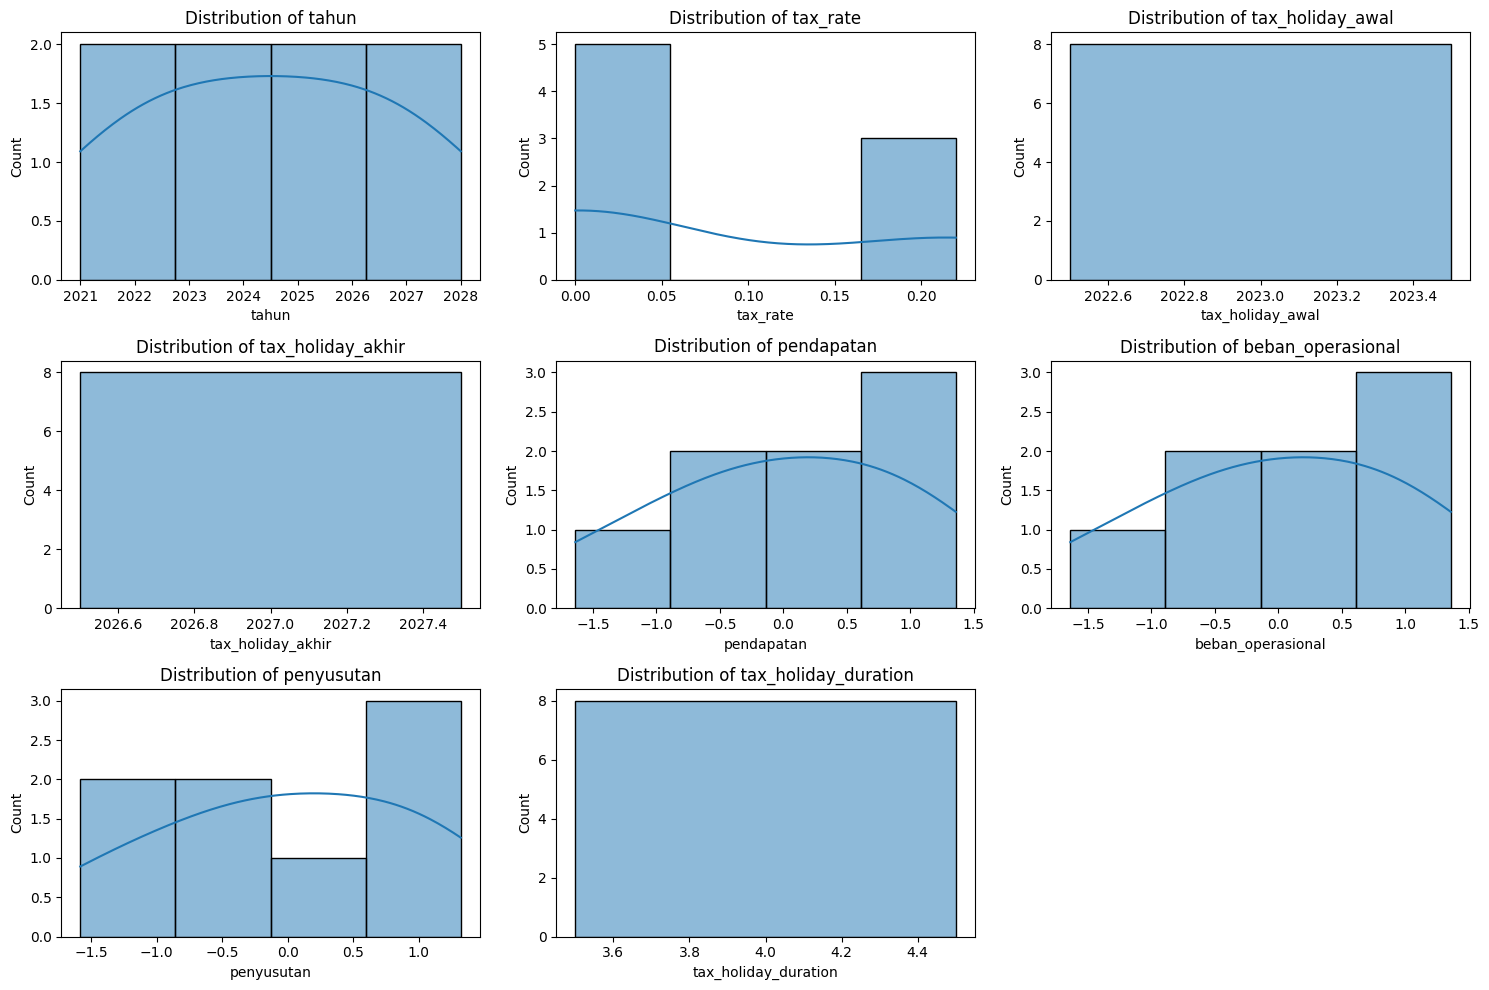

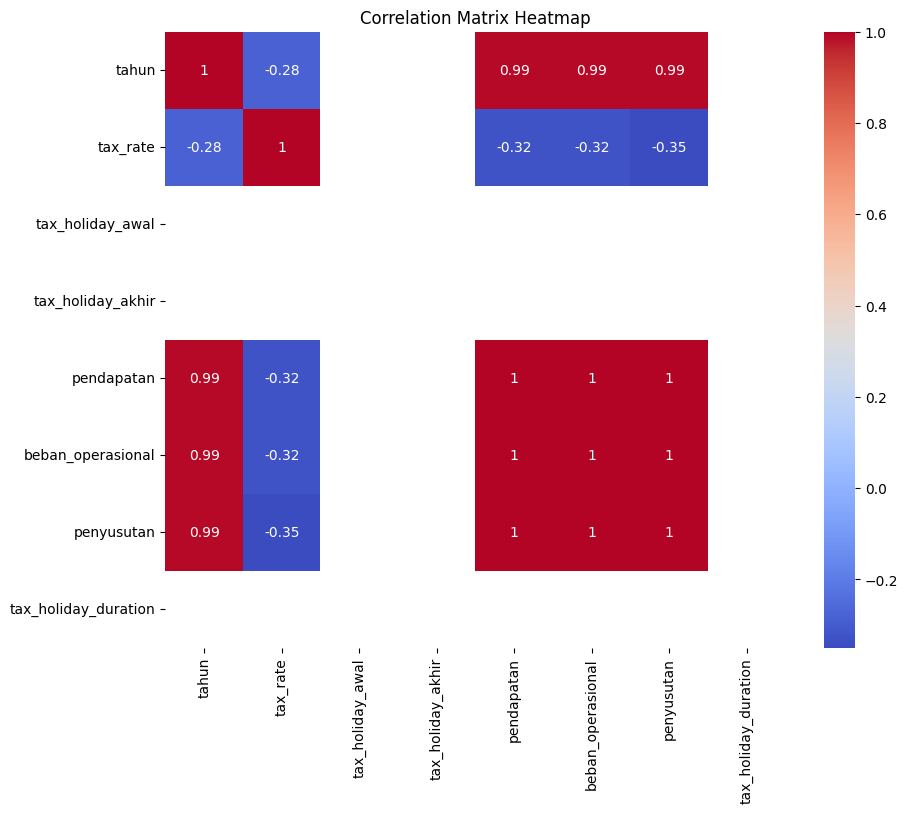

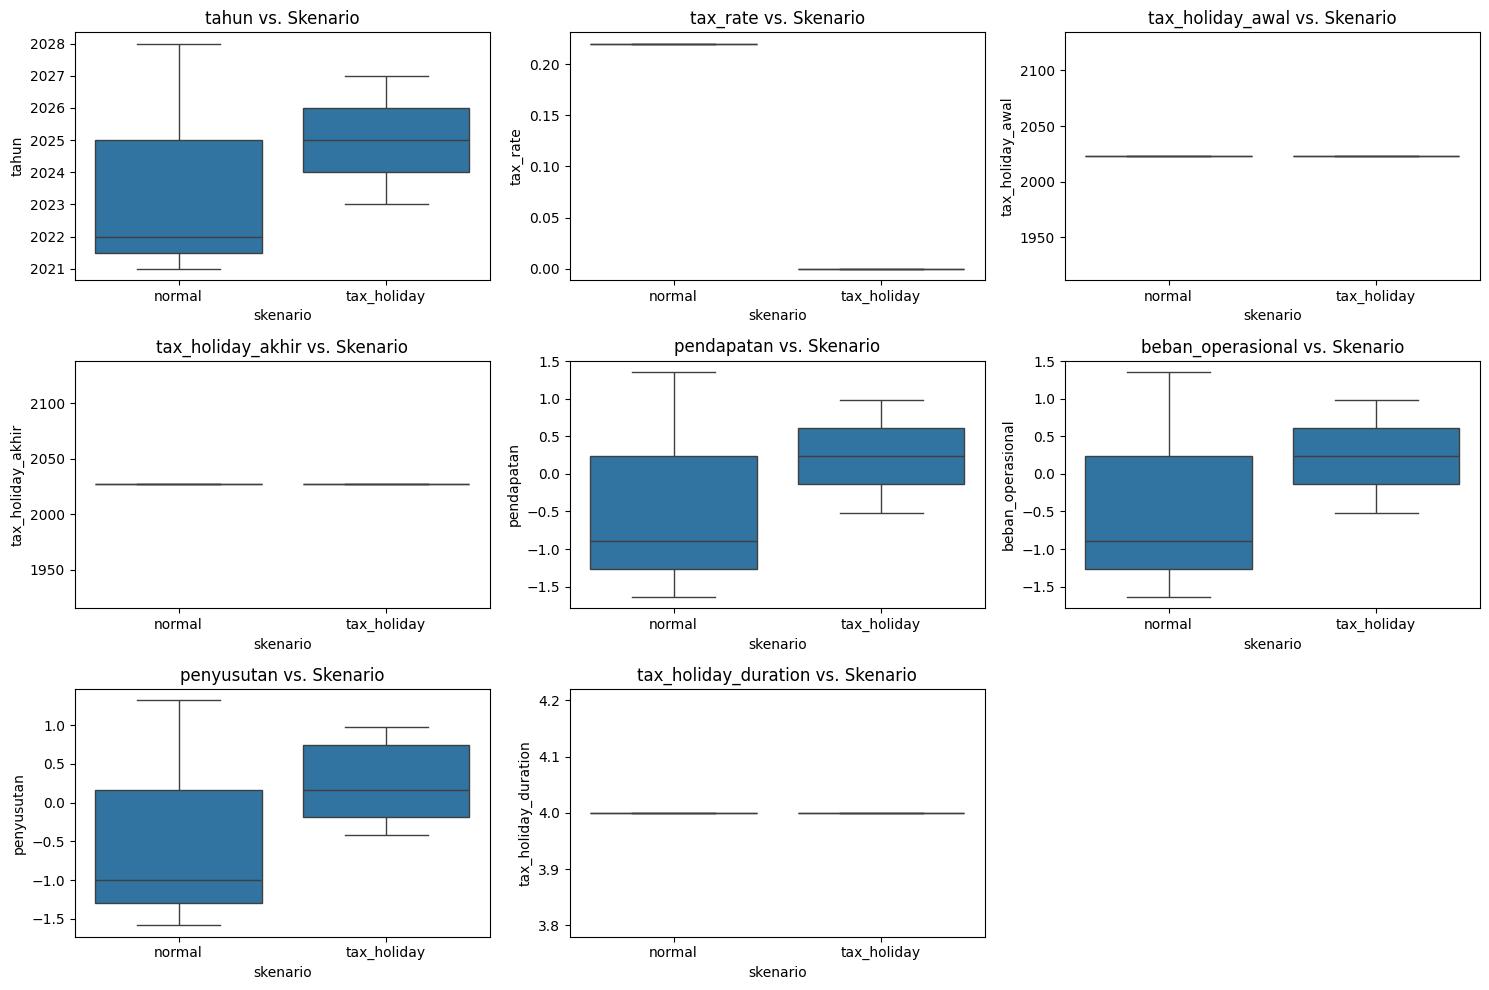


## Data Analysis Report

**Date:** 2025-06-01

**Descriptive Statistics:**

            tahun  tax_rate  tax_holiday_awal  tax_holiday_akhir  pendapatan  \
count     8.00000  8.000000               8.0                8.0    8.000000   
mean   2024.50000  0.082500            2023.0             2027.0    0.000000   
std       2.44949  0.113861               0.0                0.0    1.000000   
min    2021.00000  0.000000            2023.0             2027.0   -1.639025   
25%    2022.75000  0.000000            2023.0             2027.0   -0.608781   
50%    2024.50000  0.000000            2023.0             2027.0    0.046829   
75%    2026.25000  0.220000            2023.0             2027.0    0.702439   
max    2028.00000  0.220000            2023.0             2027.0    1.358049   

       beban_operasional  penyusutan  tax_holiday_duration  
count           8.000000    8.000000                   8.0  
mean            0.000000    0.000000                   4.0  
std             1.0

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Descriptive statistics
numerical_features = ['tahun', 'tax_rate', 'tax_holiday_awal', 'tax_holiday_akhir', 'pendapatan', 'beban_operasional', 'penyusutan', 'tax_holiday_duration']
description = df_processed[numerical_features].describe()
print("Descriptive Statistics:\n", description)

# 2. Distribution analysis
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df_processed[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# 3. Correlation analysis
correlation_matrix = df_processed[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# 4. Relationship with 'skenario'
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='skenario', y=col, data=df_processed)
    plt.title(f'{col} vs. Skenario')
plt.tight_layout()
plt.show()

# 5. Summary report
report = f"""
## Data Analysis Report

**Date:** 2025-06-01

**Descriptive Statistics:**

{description}

**Distribution Analysis:**

Histograms and density plots were generated for each numerical feature.

**Correlation Analysis:**

A correlation matrix heatmap was generated to visualize the relationships between numerical features.

**Relationship with 'skenario':**

Box plots were created to show the distribution of each numerical feature across different 'skenario' categories.

"""
print(report)

## Data visualization

### Subtask:
Create visualizations to represent the insights from the data analysis. Use color effectively to highlight trends and patterns. Generate plots such as histograms, scatter plots, box plots, and bar charts as appropriate.


**Reasoning**:
Create visualizations (histograms, scatter plots, box plots, and bar charts) to represent the insights from the data analysis. Use color effectively to highlight trends and patterns.



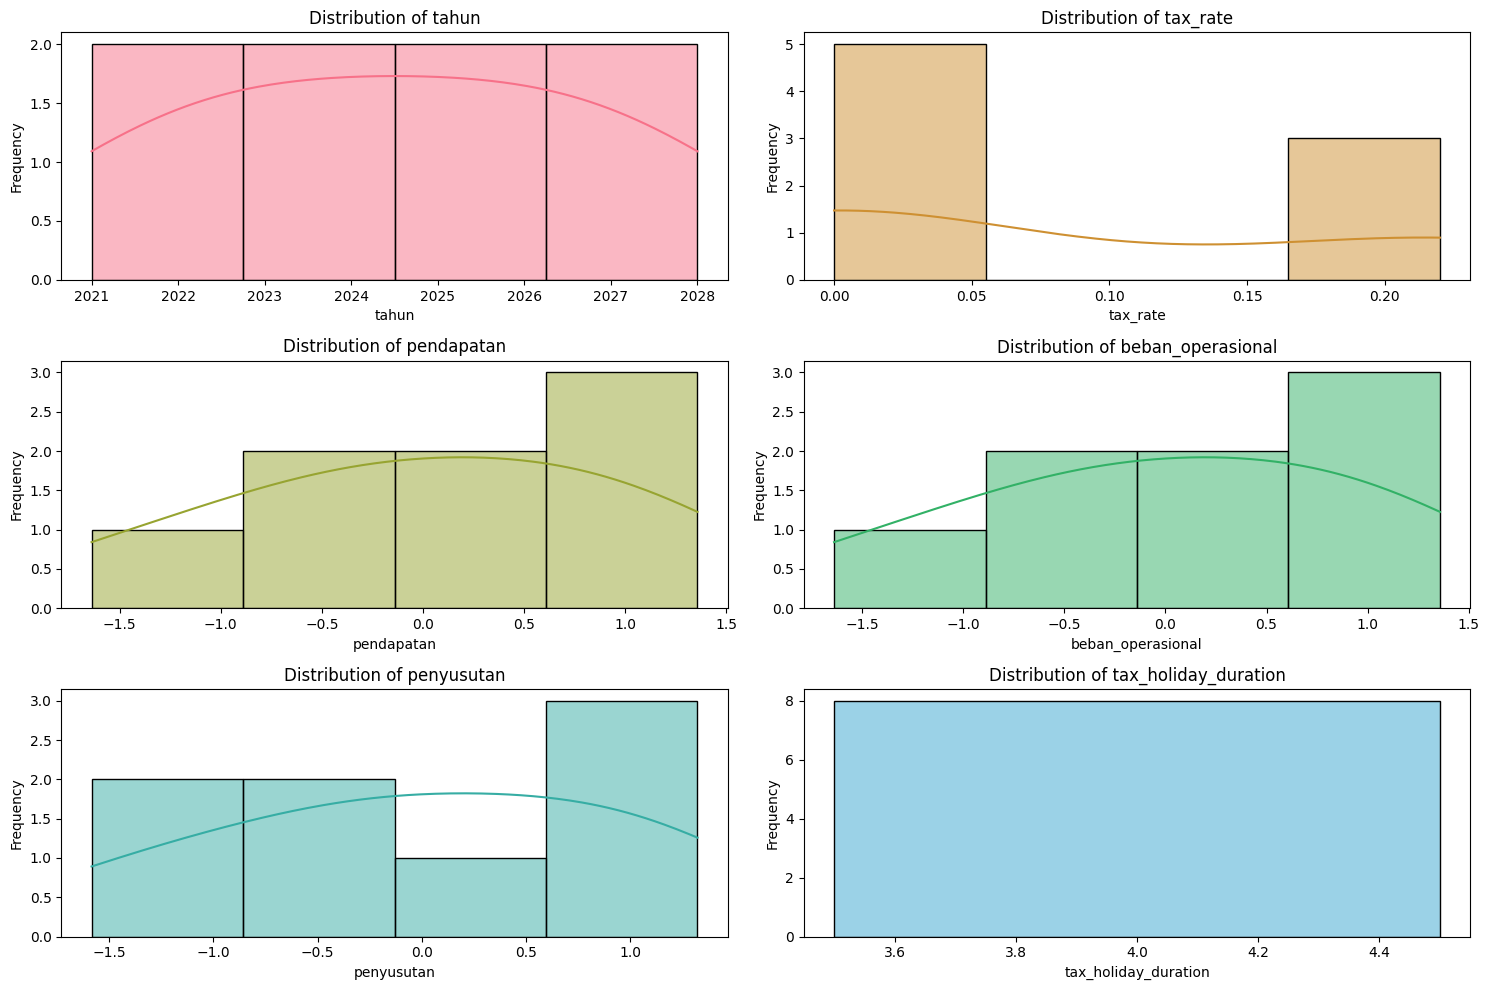

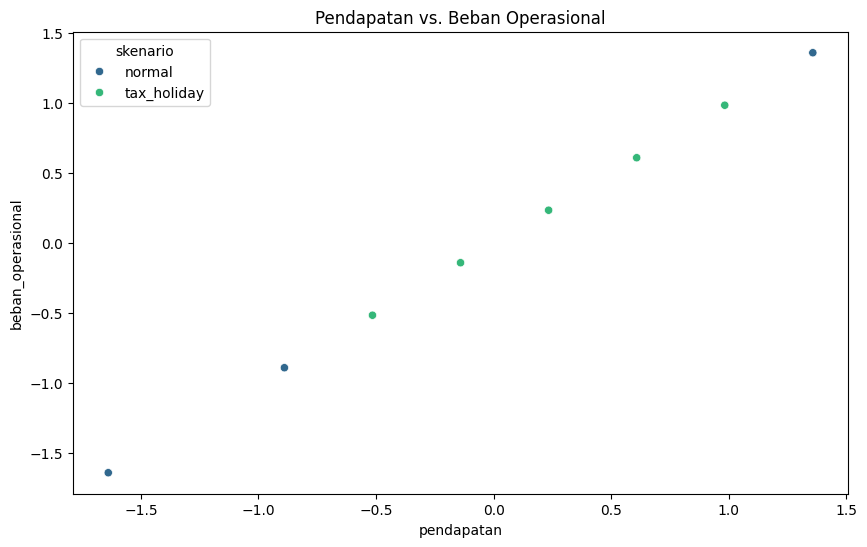

<ipython-input-8-57900410f343>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='skenario', y=col, data=df_processed, palette='Set3')
<ipython-input-8-57900410f343>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='skenario', y=col, data=df_processed, palette='Set3')
<ipython-input-8-57900410f343>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='skenario', y=col, data=df_processed, palette='Set3')
<ipython-input-8-57900410f343>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14

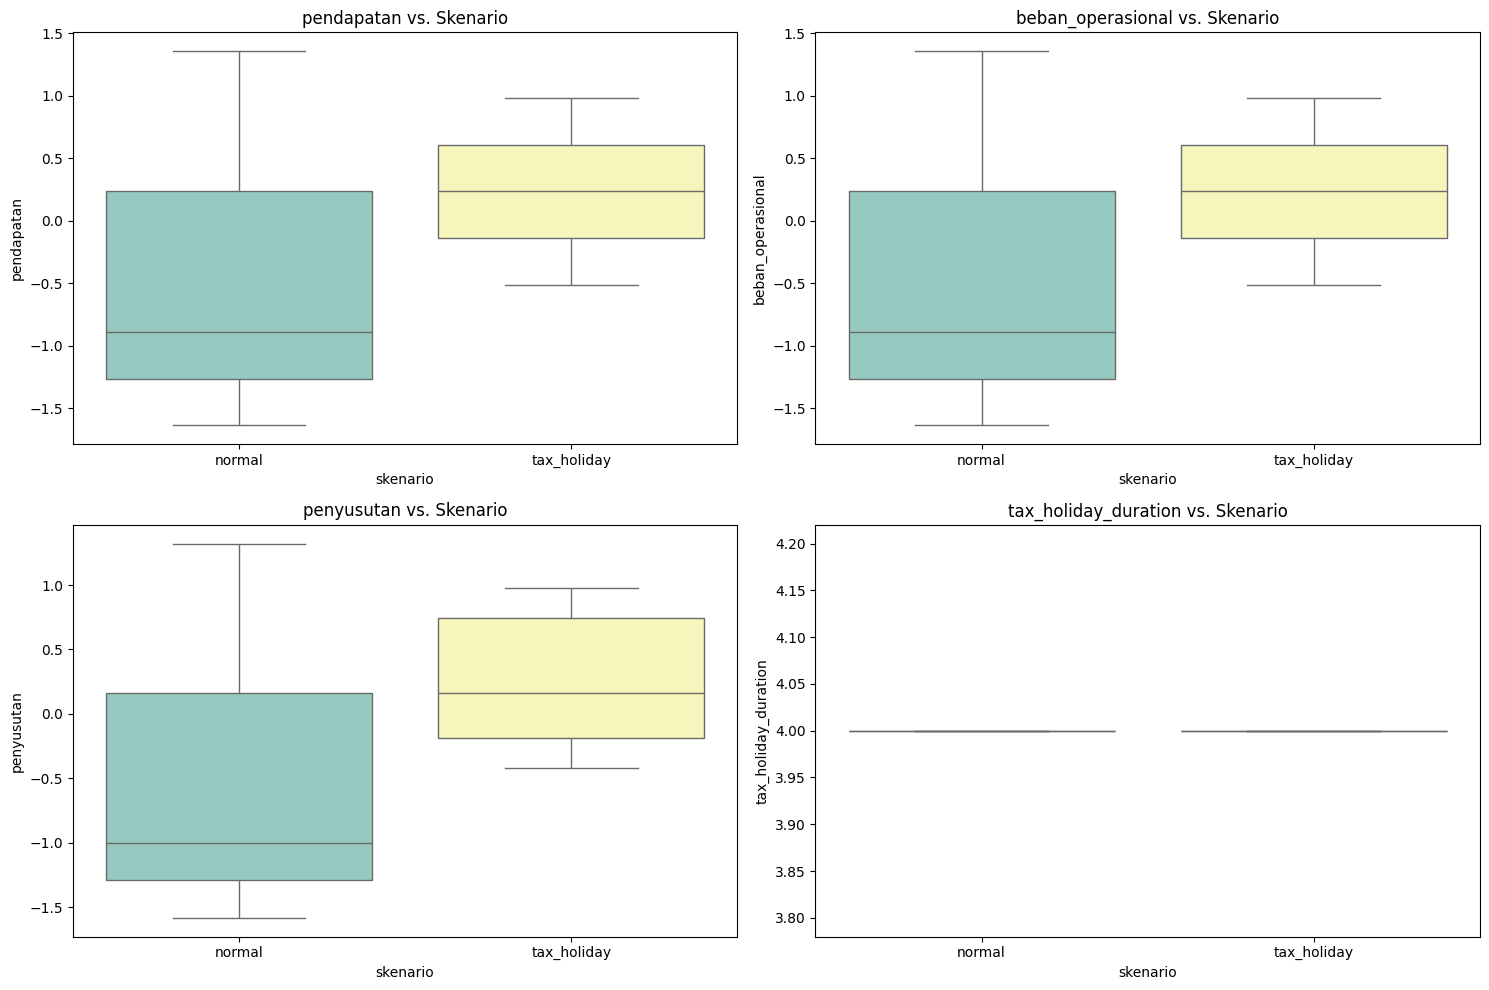

<ipython-input-8-57900410f343>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='skenario', data=df_processed, palette='pastel')


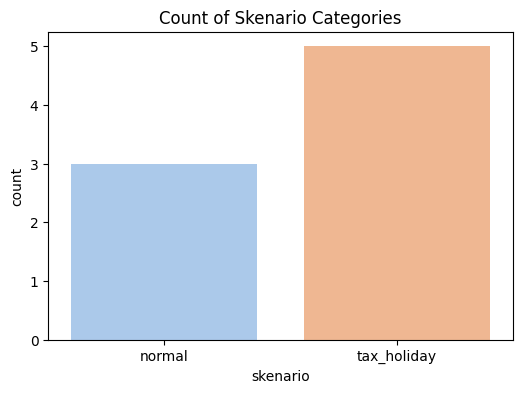

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
plt.figure(figsize=(15, 10))
for i, col in enumerate(['tahun', 'tax_rate', 'pendapatan', 'beban_operasional', 'penyusutan', 'tax_holiday_duration']):
    plt.subplot(3, 2, i + 1)
    sns.histplot(df_processed[col], kde=True, color=sns.color_palette("husl", 8)[i]) # Use different colors
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Scatter Plots (focus on moderately to highly correlated features - visual inspection from previous correlation matrix)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pendapatan', y='beban_operasional', hue='skenario', data=df_processed, palette='viridis')
plt.title('Pendapatan vs. Beban Operasional')
plt.show()

# Box Plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(['pendapatan', 'beban_operasional', 'penyusutan', 'tax_holiday_duration']):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='skenario', y=col, data=df_processed, palette='Set3')
    plt.title(f'{col} vs. Skenario')
plt.tight_layout()
plt.show()

# Bar Charts
plt.figure(figsize=(6, 4))
sns.countplot(x='skenario', data=df_processed, palette='pastel')
plt.title('Count of Skenario Categories')
plt.show()

**Reasoning**:
The previous code block generated the visualizations, but there were warnings about the `palette` argument in `sns.boxplot` and `sns.countplot`.  I will fix these warnings by assigning the `x` variable to `hue` and setting `legend=False`.  I'll also add more descriptive axis labels and adjust the figure sizes for better readability.  Then, I'll finish the task.



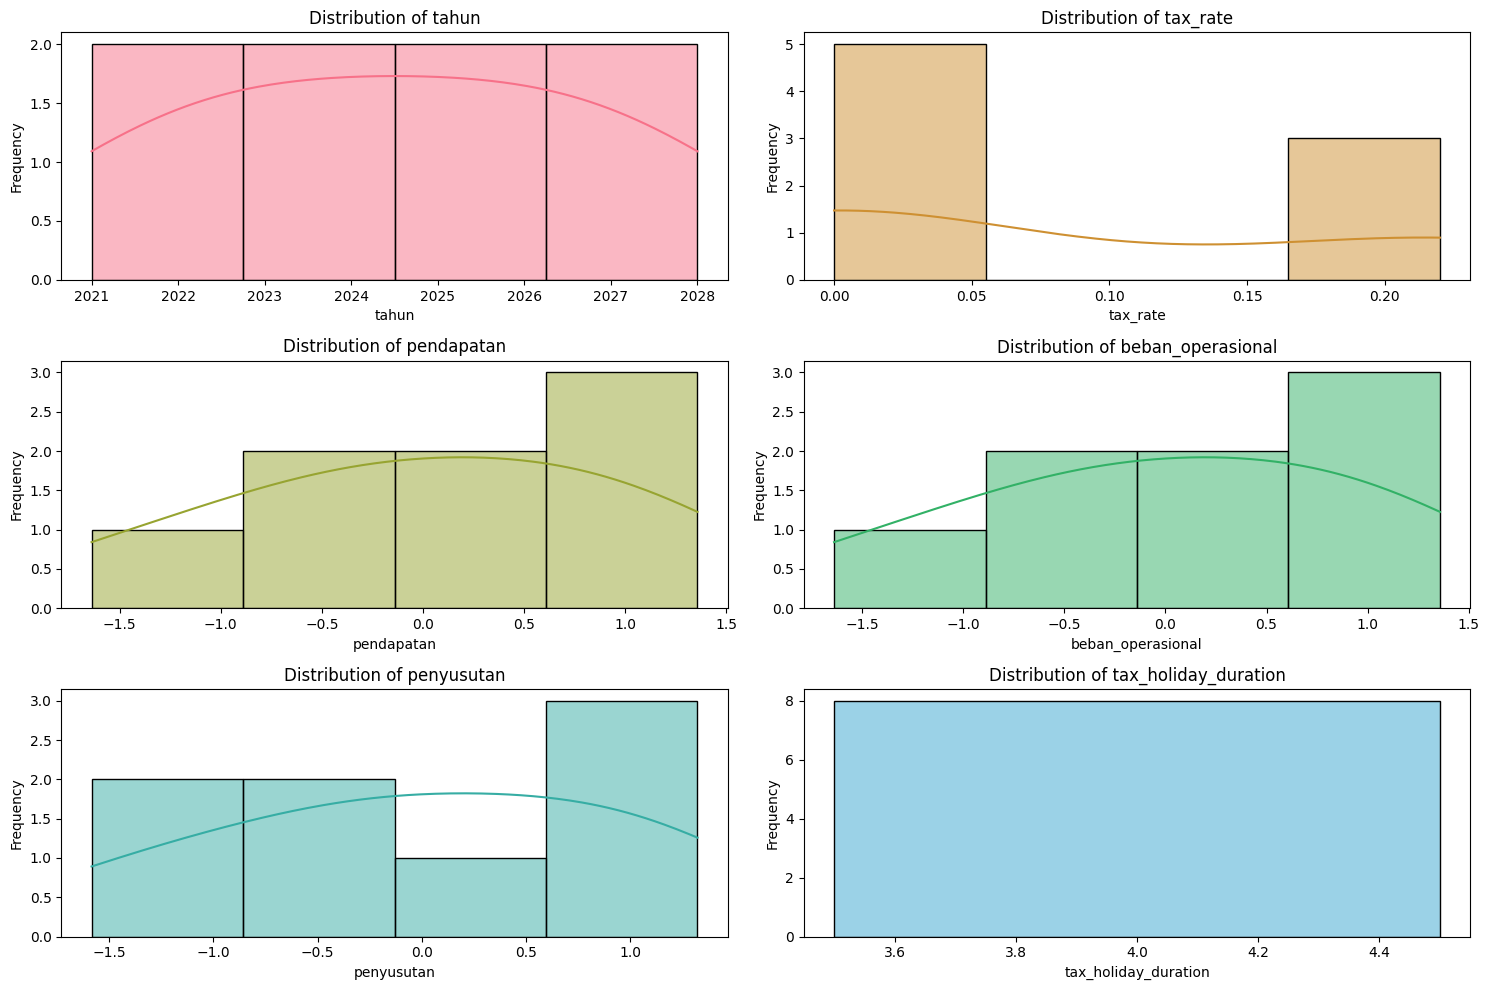

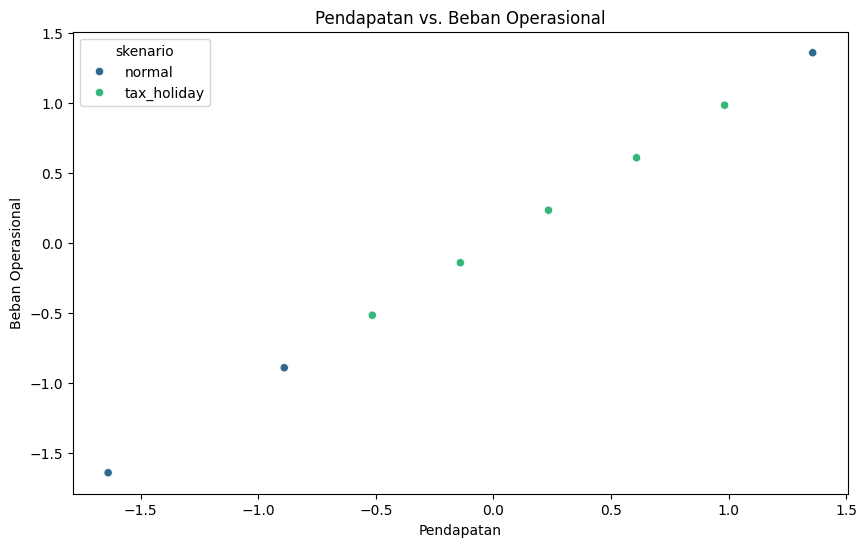

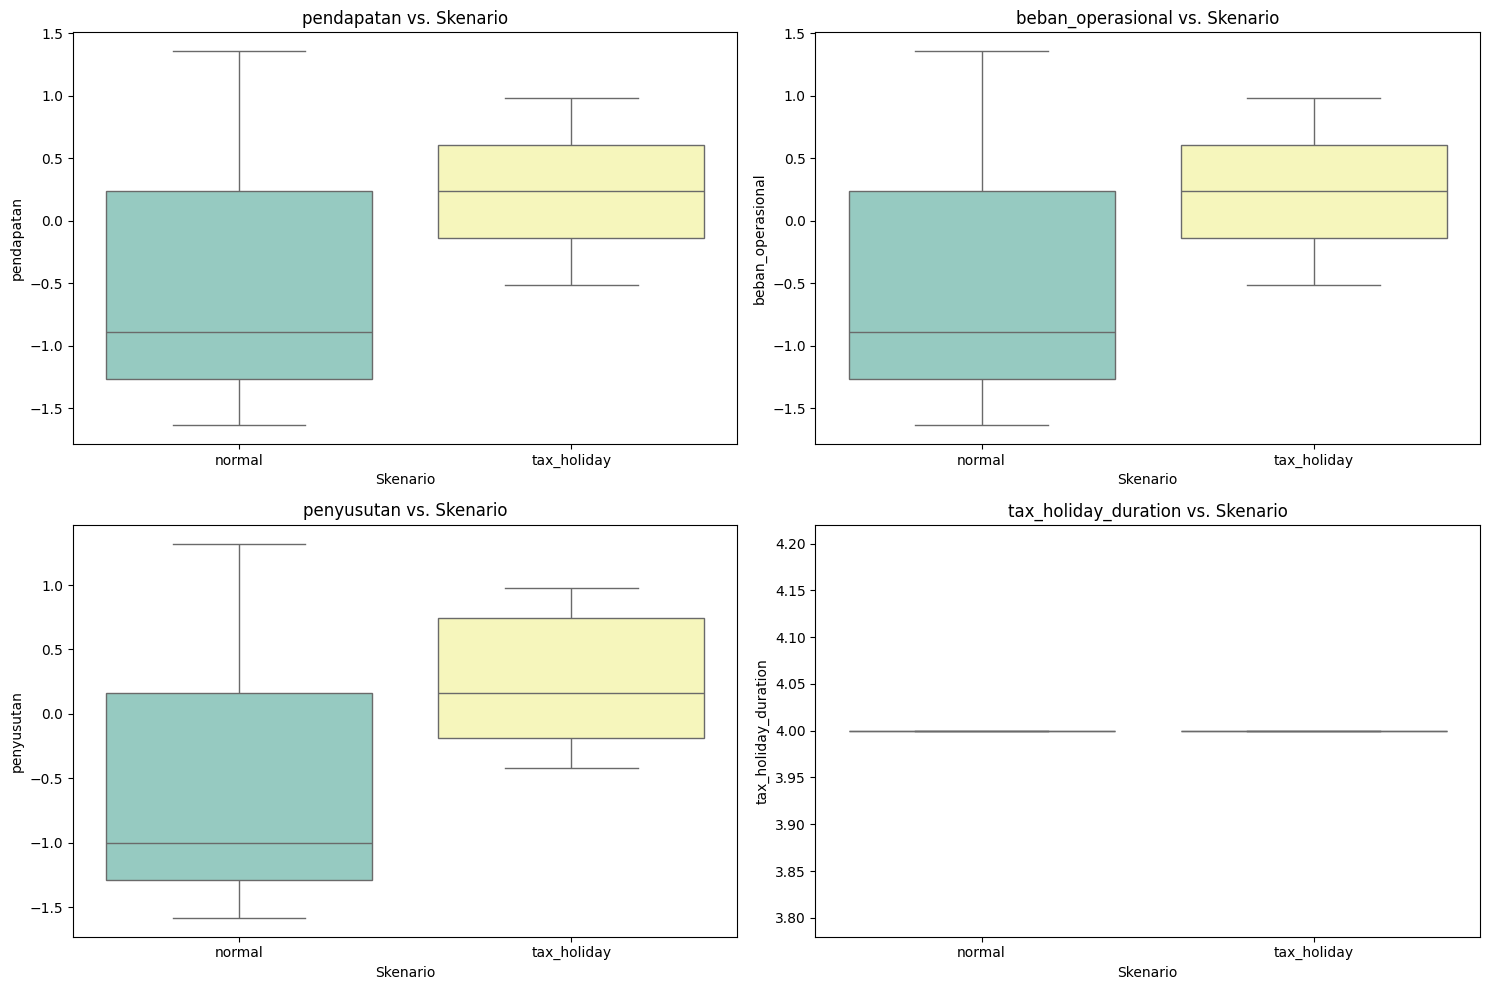

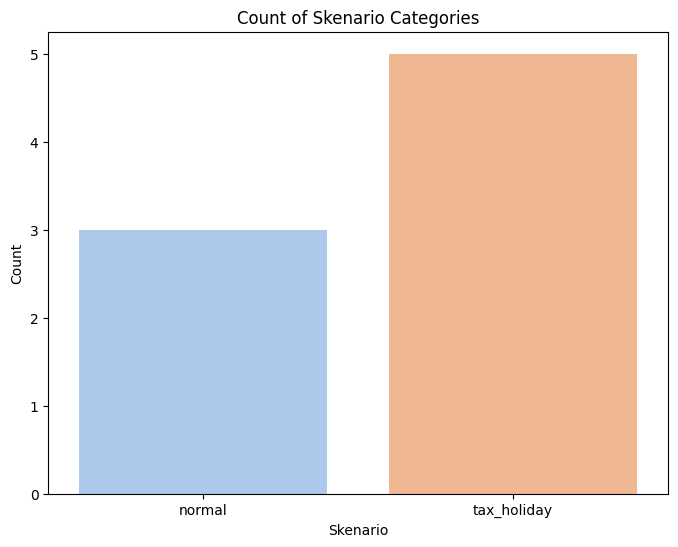

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
plt.figure(figsize=(15, 10))
for i, col in enumerate(['tahun', 'tax_rate', 'pendapatan', 'beban_operasional', 'penyusutan', 'tax_holiday_duration']):
    plt.subplot(3, 2, i + 1)
    sns.histplot(df_processed[col], kde=True, color=sns.color_palette("husl", 8)[i])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Scatter Plots
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pendapatan', y='beban_operasional', hue='skenario', data=df_processed, palette='viridis')
plt.title('Pendapatan vs. Beban Operasional')
plt.xlabel('Pendapatan')
plt.ylabel('Beban Operasional')
plt.show()

# Box Plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(['pendapatan', 'beban_operasional', 'penyusutan', 'tax_holiday_duration']):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='skenario', y=col, data=df_processed, palette='Set3', hue='skenario', legend=False) # Corrected line
    plt.title(f'{col} vs. Skenario')
    plt.xlabel('Skenario')
    plt.ylabel(col)
plt.tight_layout()
plt.show()


# Bar Charts
plt.figure(figsize=(8, 6))
sns.countplot(x='skenario', data=df_processed, palette='pastel', hue='skenario', legend=False) #Corrected Line
plt.title('Count of Skenario Categories')
plt.xlabel('Skenario')
plt.ylabel('Count')
plt.show()

## Summary:

### Q&A
No questions to answer.

### Data Analysis Key Findings
* **Data Loading and Exploration**: The dataset, "combined\_data.csv", contains 8 rows and 8 columns, including financial information like tax rates, revenues, operating expenses, and depreciation, categorized by scenarios. No missing values were found.
* **Data Cleaning**: The 'tahun', 'tax\_holiday\_awal', and 'tax\_holiday\_akhir' columns were converted to numeric data types. Duplicate rows were removed.
* **Data Wrangling**: A new feature, 'tax\_holiday\_duration', was engineered. Outliers in 'pendapatan', 'beban\_operasional', and 'penyusutan' were handled using winsorizing. Numerical features were standardized using Z-score normalization.
* **Data Analysis**: Descriptive statistics, distributions, correlations, and relationships with the 'skenario' variable were analyzed. The mean 'tax\_rate' was 0.0825 and the mean 'tahun' was 2024.5.
* **Data Visualization**: Histograms, scatter plots, box plots, and bar charts were generated to visualize data distributions, relationships between variables, and comparisons across scenarios.


### Insights or Next Steps
* Investigate the relationships between 'pendapatan', 'beban\_operasional', and 'penyusutan' across different 'skenario' categories more deeply.  The visualizations provide a starting point, but further analysis could reveal more nuanced patterns.
* Explore potential predictive models using the processed data to forecast financial performance based on the various scenarios.
